### Data Exploration
## In this notebook we look at the data in detail to understand & highliht the work needed to work with it (e.g. Cleaning, Transforming, Merging...)
# Part of the Udacity Data Scientist nanodegree - Project 1 : Writing a Data Scientist Blog Post


In [13]:
#Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline

In [49]:
#Loading the data
# Picked up from http://insideairbnb.com/get-the-data/

#df = pd.read_csv('Florence/listings_Sample.csv')
df = pd.read_csv('Florence/listings_Full.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,85820,https://www.airbnb.com/rooms/85820,20220611041213,2022-06-11,Salcio room in B&B La Martellina,A big double bedroom with a canopy bed and two...,"A small village, full of tranquility, gardens,...",https://a0.muscache.com/pictures/41fcd3cd-3557...,470473,https://www.airbnb.com/users/show/470473,...,4.93,4.57,4.93,NaN,t,4,0,4,0,0.16
1,20078945,https://www.airbnb.com/rooms/20078945,20220611041213,2022-06-11,Casa Bonannia O,Casa Bonannia O is a romantic and welcoming tw...,NaN,https://a0.muscache.com/pictures/220fa8c5-7750...,141678952,https://www.airbnb.com/users/show/141678952,...,NaN,NaN,NaN,NaN,t,3,3,0,0,NaN
2,24469,https://www.airbnb.com/rooms/24469,20220611041213,2022-06-11,Fortezza/City Centre Modern Apt 2+2,"Apartment, perfect for 2 people, wide, bright ...",In 10/15 minutes walking or with only one stop...,https://a0.muscache.com/pictures/fd822ef3-4f6d...,99178,https://www.airbnb.com/users/show/99178,...,5.00,4.00,5.00,NaN,t,4,4,0,0,0.03
3,182984,https://www.airbnb.com/rooms/182984,20220611041213,2022-06-11,"Central, quiet near the Old Bridge",<b>The space</b><br />Apartment features (Slee...,San Niccolò is a trendy area with lots of rest...,https://a0.muscache.com/pictures/1167589/d0f1d...,877420,https://www.airbnb.com/users/show/877420,...,4.45,5.00,4.45,NaN,f,1,1,0,0,0.12
4,463942,https://www.airbnb.com/rooms/463942,20220611041213,2022-06-11,BB Casa Schlatter Artist's Atelier. Room #3,"Room 'Gardener', with private bathroom, air co...",Located in a quiet neighborhood at the foot of...,https://a0.muscache.com/pictures/5531440/362cd...,2272298,https://www.airbnb.com/users/show/2272298,...,4.89,4.22,4.78,NaN,f,4,1,3,0,0.09


In [15]:
#Sizing the Dataset
df.shape

(10748, 74)

In [45]:
#Overview of the data
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,minimum_nights,maximum_nights,...,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
count,1.074800e+04,1.074800e+04,1.074800e+04,10748.000000,10748.000000,10748.000000,10748.000000,10748.000000,10748.000000,10748.000000,...,10748.000000,10748.000000,10748.000000,10748.000000,10748.000000,10748.000000,10748.000000,10748.000000,10748.000000,10748.000000
mean,5.377944e+16,2.022061e+13,1.063976e+08,24.738463,24.738463,43.773413,11.254194,3.776889,4.484183,614.537868,...,12.453759,24.872255,160.164124,53.629792,10.269352,1.416170,11.715296,10.566059,1.038519,0.014142
std,1.718570e+17,2.379017e+00,1.250471e+08,99.087858,99.087858,0.012327,0.019162,2.046700,27.232059,7062.061131,...,15.020875,24.900763,119.956649,87.881122,17.400945,2.260784,26.697693,26.559708,2.618230,0.238605
min,2.446900e+04,2.022061e+13,1.565100e+04,0.000000,0.000000,43.706560,11.131620,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.288065e+07,2.022061e+13,1.211682e+07,1.000000,1.000000,43.768490,11.245675,2.000000,1.000000,30.000000,...,0.000000,0.000000,39.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,2.686664e+07,2.022061e+13,4.661589e+07,3.000000,3.000000,43.772510,11.254240,4.000000,2.000000,365.000000,...,7.000000,18.000000,161.000000,14.000000,2.000000,0.000000,3.000000,2.000000,0.000000,0.000000
75%,4.480136e+07,2.022061e+13,1.653978e+08,9.000000,9.000000,43.777910,11.261662,4.000000,3.000000,1125.000000,...,19.000000,41.000000,272.000000,67.000000,13.000000,2.000000,8.000000,6.000000,1.000000,0.000000
max,6.460393e+17,2.022061e+13,4.634048e+08,1507.000000,1507.000000,43.850230,11.357540,16.000000,1120.000000,730000.000000,...,60.000000,90.000000,365.000000,894.000000,222.000000,20.000000,154.000000,154.000000,26.000000,6.000000


## Identification of data types

In [80]:
df.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
                                                 ...   
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
explo_type                                       object
Length: 75, dtype: object

In [96]:
df_float = df.select_dtypes('float').columns
df_object = df.select_dtypes('object').columns
df_int = df.select_dtypes('int64').columns
df_bool = df.select_dtypes('bool').columns
df_datetime = df.select_dtypes('datetime64').columns
print("Floats ="+ str(df_float.shape[0])+ " / Objects ="+str(df_object.shape[0]) +" / Ints ="+str(df_int.shape[0])+" / Bools ="+ str(df_bool.shape[0])+" / Datetimes ="+ str(df_datetime.shape[0]))

Floats =17 / Objects =35 / Ints =23 / Bools =0 / Datetimes =0


In [72]:
#Looking at Missing values

df_missing = df.columns[df.isnull().any()]
df_missing_num = df[df_missing].isnull().sum()/len(df)
df_missing_num.sort_values(ascending=True, inplace=True)
df_missing_num




name                            0.000186
bathrooms_text                  0.000930
host_location                   0.001116
beds                            0.010514
description                     0.015724
bedrooms                        0.031076
host_acceptance_rate            0.118348
host_response_rate              0.153238
host_response_time              0.153238
review_scores_rating            0.160867
last_review                     0.160867
first_review                    0.160867
reviews_per_month               0.160867
review_scores_accuracy          0.165519
review_scores_cleanliness       0.165519
review_scores_communication     0.165705
review_scores_checkin           0.165798
review_scores_location          0.165798
review_scores_value             0.165891
host_neighbourhood              0.277819
host_about                      0.362207
neighborhood_overview           0.370953
neighbourhood                   0.370953
license                         0.919706
calendar_updated

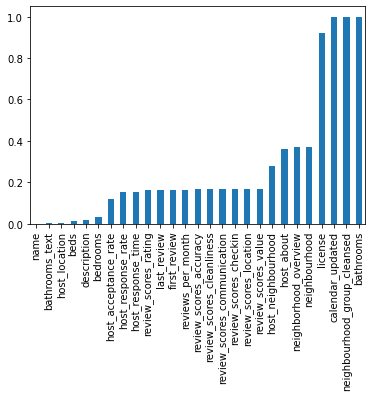

In [73]:
df_missing_num.plot(kind="bar");

In [99]:
#Looking at neighbourhoods in details

unique_hoods = df.groupby('neighbourhood')['id'].nunique()

unique_hoods

#unique_hoods.plot(kind="bar")

neighbourhood
50139, Firenze, Italy                    1
Bagno A Ripoli, Florence, Italy          1
Bagno A Ripoli, Toscana, Italy           5
Bagno A Ripoli, Tuscany, Italy           1
Bagno a Ripoli, Toscana, Italy          11
                                        ..
Valico, Toscana, Italy                   1
Vicolo dell'Oro, 1A, Florence, Italy     1
firenze , I, Italy                       1
firenze, Toscana, Italy                  1
firenze, fi, Italy                       2
Name: id, Length: 98, dtype: int64